In [3]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [4]:
# Read in data
df = pd.read_csv('movies.csv',sep=',')

In [6]:
# Look at the data
df.sort_values(by='gross', ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [8]:
# Check for missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

<AxesSubplot:>

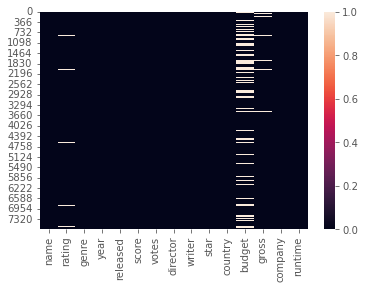

In [14]:
# Visualise the null data
sns.heatmap(df.isnull())

In [15]:
# check size of data set
df.shape

(7668, 15)

In [16]:
# check data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


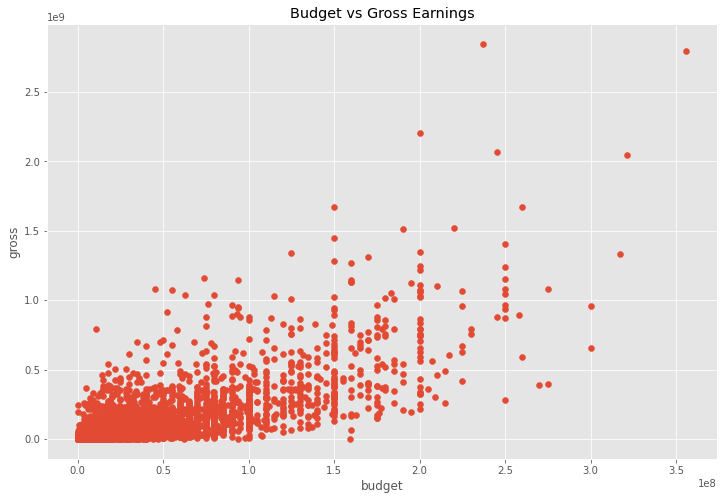

In [75]:
# Scatterplot with budget vs gross revenue
plt.figure(figsize=(12,8))
plt.xlabel('budget')
plt.ylabel('gross')
plt.title('Budget vs Gross Earnings')
plt.scatter(df['budget'], df['gross'])

<AxesSubplot:title={'center':'Gross vs budget regression plot'}, xlabel='budget', ylabel='gross'>

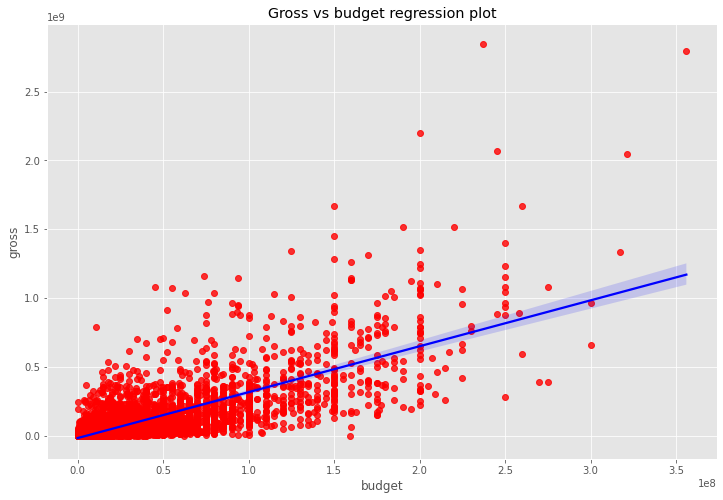

In [80]:
# Plot regression plot for budget vs gross
plt.figure(figsize=(12,8))
plt.title('Gross vs budget regression plot')
sns.regplot(data=df, x='budget', y='gross', scatter_kws= {'color': 'red'}, line_kws={'color': 'blue'})

<AxesSubplot:title={'center':'Movie features correlation'}>

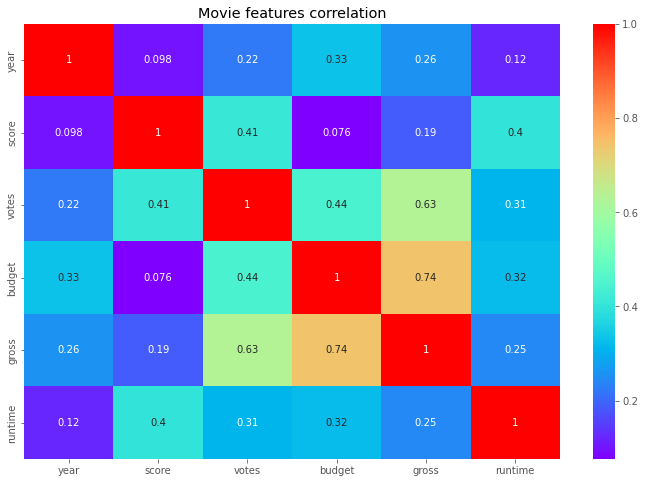

In [88]:
# What is the correlation
plt.figure(figsize=(12,8))
plt.title('Movie features correlation')
plt.xlabel('features')
plt.ylabel('features')
sns.heatmap(df.corr(), cmap='rainbow', annot=True)

In [91]:
# Create categorical numbers for each non-numeric column
df_numerized = df

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6586,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5572,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5141,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


<AxesSubplot:>

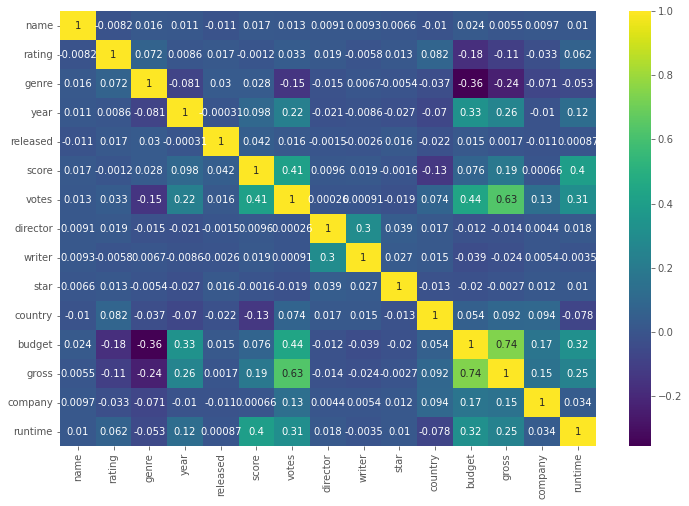

In [96]:
# Create a correlation matrix from the new numeric data above
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

In [102]:
corr_df = df_numerized.corr()
corr_pairs = corr_df.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008233
         genre       0.016173
         year        0.011245
         released   -0.010901
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [104]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs[sorted_pairs >0.5]

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings